# Pymaceuticals Inc.
---

### Analysis

- More mice were treated with Capomulin and Ramicane.
- The sex of mice were almost evenly distributed between male and female.
- Infubinol was the only treatment with an outlier.
- The best results for final tumor volumes were the tumors that were treated with Capomulin and Ramicane.
- For test mouse b128, the Capomulin treatment seems to have had a positive affect by reducing the size of the tumor over the testing phase.
- There is a strong correlation with the Capomulin treated mice. The larger the mouse weight, the larger the tumor volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_id_countDF = len(complete_mouse_study["Mouse ID"].unique())
mouse_id_countDF

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
 
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = complete_mouse_study.loc[complete_mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseId_data = complete_mouse_study.loc[complete_mouse_study["Mouse ID"]=="g989"]
duplicate_mouseId_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_complete_mouse_study = complete_mouse_study[complete_mouse_study["Mouse ID"].isin(duplicate_mouse_id)==False]
cleaned_complete_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_id_count = len(cleaned_complete_mouse_study["Mouse ID"].unique())
cleaned_mouse_id_count

248

## Summary Statistics

In [7]:
# List of drug regimens for ref.
list_of_drugs = cleaned_complete_mouse_study["Drug Regimen"].unique()
list_of_drugs

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


# mean, median, variance, standard deviation, and SEM of the tumor volume. 

means = cleaned_complete_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = cleaned_complete_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = cleaned_complete_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sds = cleaned_complete_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = cleaned_complete_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_table = pd.DataFrame ({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Variance Tumor Volume": variances,
    "Standard Deviation Tumor Volume": sds,
    "Standand Error Tumor Volume": sems 
})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standand Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

statsList = ["mean", "median", "var", "std", "sem"]
tumor_stats = {"Tumor Volume (mm3)":statsList}


# Using the aggregation method, produce the same summary statistics in a single line

summary_table_2 = cleaned_complete_mouse_study.groupby("Drug Regimen").agg(tumor_stats)
summary_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Drug regimen counts
drug_regimen_counts = cleaned_complete_mouse_study["Drug Regimen"].value_counts()
drug_regimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

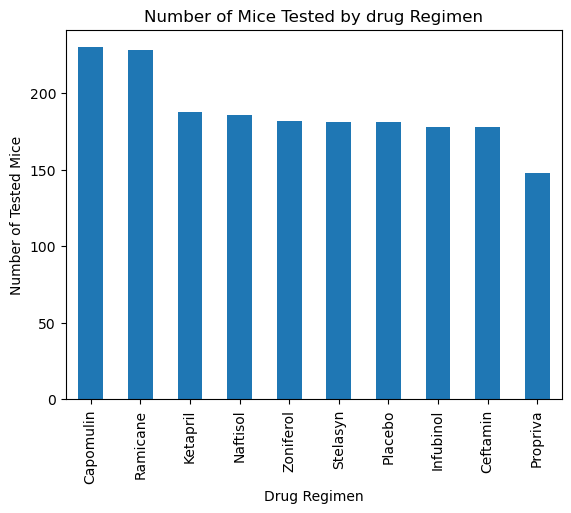

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tested Mice")
plt.title("Number of Mice Tested by drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [12]:
# Drug regimen index values
drug_regimen_counts.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [13]:
# Drug regimen counts
drug_regimen_counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

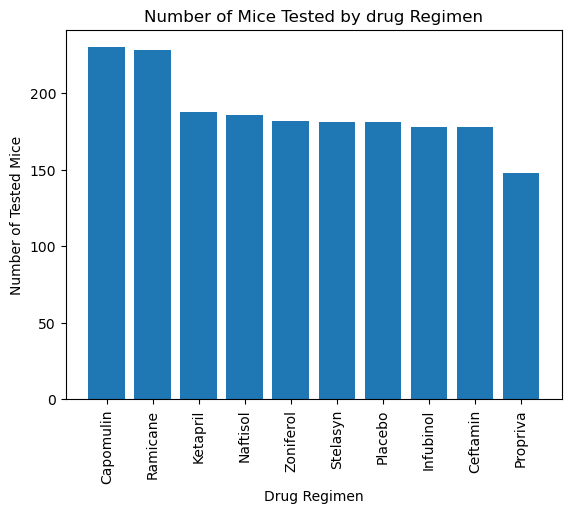

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_counts.index.values,
       drug_regimen_counts.values)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tested Mice")
plt.title("Number of Mice Tested by drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [15]:
# Gender counts
maleVSfemale_counts = cleaned_complete_mouse_study["Sex"].value_counts()
maleVSfemale_counts

Sex
Male      958
Female    922
Name: count, dtype: int64

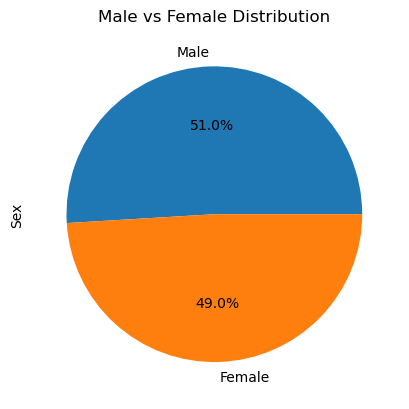

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
maleVSfemale_counts.plot(
    kind="pie",
    autopct="%1.1f%%"
)
plt.ylabel("Sex")
plt.title("Male vs Female Distribution")
plt.show()

In [17]:
maleVSfemale_counts.index.values

array(['Male', 'Female'], dtype=object)

In [18]:
maleVSfemale_counts.values

array([958, 922], dtype=int64)

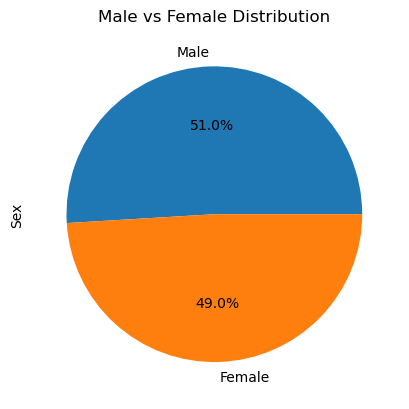

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    maleVSfemale_counts.values,
    labels=maleVSfemale_counts.index.values,
    autopct="%1.1f%%"
)
plt.ylabel("Sex")
plt.title("Male vs Female Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestTimepoint = cleaned_complete_mouse_study.groupby("Mouse ID")["Timepoint"].max()
greatestTimepoint = greatestTimepoint.reset_index()
greatestTimepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedData = greatestTimepoint.merge(cleaned_complete_mouse_study, how="left", on=["Mouse ID", "Timepoint"])
mergedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


In [23]:
# Treatment for loop
for treatment in treatmentList:
    final_tumor_vol = mergedData.loc[mergedData["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
final_tumor_vol

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [24]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatmentList:
    final_tumor_vol = mergedData.loc[mergedData["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    tumor_vol_data.append(final_tumor_vol)
    
tumor_vol_data

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [25]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatmentList:
    final_tumor_vol = mergedData.loc[mergedData["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset to empty list 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerBound = lowerq - (1.5*iqr)
    upperBound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lowerBound) | (final_tumor_vol > upperBound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
        print(output)
    

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers: None


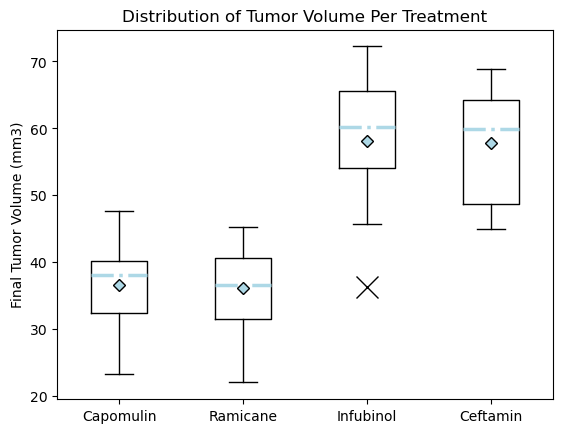

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# customized outliers
flierprops = dict(marker='x', markerfacecolor='firebrick', markersize='16',
                  markeredgecolor='black')
# customized media line
medianprops = dict(linestyle='-.', linewidth=2.5, color='lightblue')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='lightblue')
plt.boxplot(tumor_vol_data, labels = treatmentList,flierprops=flierprops,medianprops=medianprops,meanprops=meanpointprops,
            showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distribution of Tumor Volume Per Treatment")
plt.show()

## Line and Scatter Plots

In [77]:
# Capomulin datafrome
capomulinDF.head()
capomulinDF = cleaned_complete_mouse_study.loc[cleaned_complete_mouse_study["Drug Regimen"]=="Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [78]:
# Single mouse tested with Capomulin dataframe
test_mouse_b128 = capomulinDF.loc[capomulinDF["Mouse ID"]=="b128"]
test_mouse_b128

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


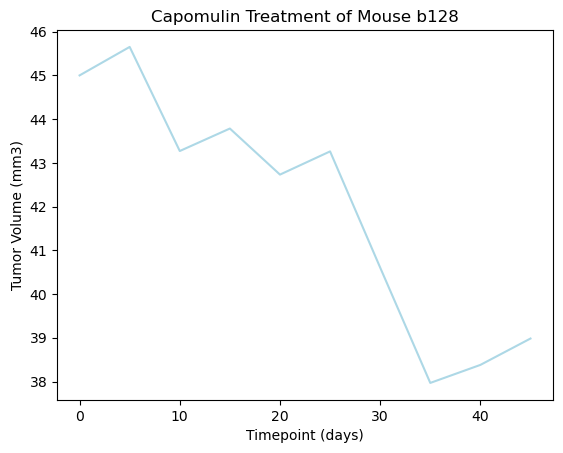

In [79]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin 
# (Timepoint - x value; tumor volume - y value)
plt.plot(
    test_mouse_b128["Timepoint"],
    test_mouse_b128["Tumor Volume (mm3)"],
    color="lightblue"
)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()


In [80]:
# Group by mouse id and calculate means
grouped_capomulin_mouseidDF = capomulinDF.groupby("Mouse ID")
grouped_capomulin_mouseidDF

capomulin_averagesDF = grouped_capomulin_mouseidDF.mean("Mouse ID")
capomulin_averagesDF.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


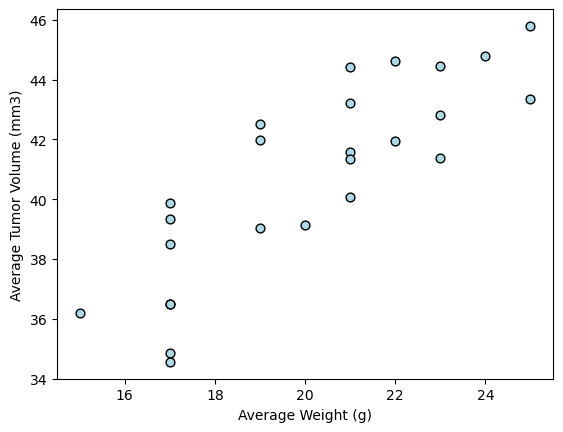

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
    capomulin_averagesDF["Weight (g)"],
    capomulin_averagesDF["Tumor Volume (mm3)"],
    facecolor="lightblue",
    edgecolor="black",
    s=40
)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [82]:
# Calculate correlation coefficient
corr = st.pearsonr(capomulin_averagesDF["Weight (g)"],capomulin_averagesDF["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


In [83]:
# Calculate linear regression model
x_values = capomulin_averagesDF["Weight (g)"]
y_values = capomulin_averagesDF["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_averagesDF["Weight (g)"],
                                                           capomulin_averagesDF["Tumor Volume (mm3)"])

regress_value = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

The correlation between mouse weight and the average tumor volume is 0.84


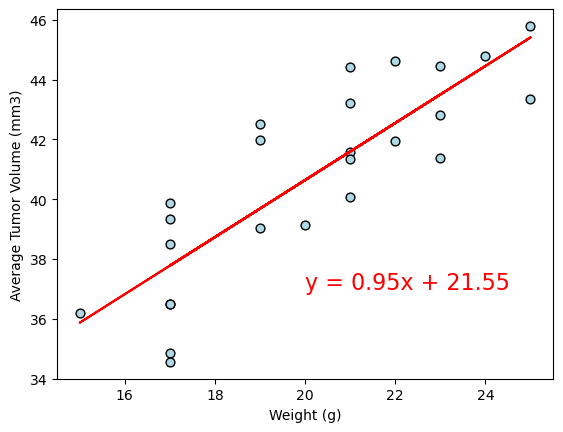

In [84]:
# Correlation and Regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black", s=40)

plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (20, 37), fontsize=16, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}"))
plt.show()